In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

[Kaggle Dataset] (https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat)


In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

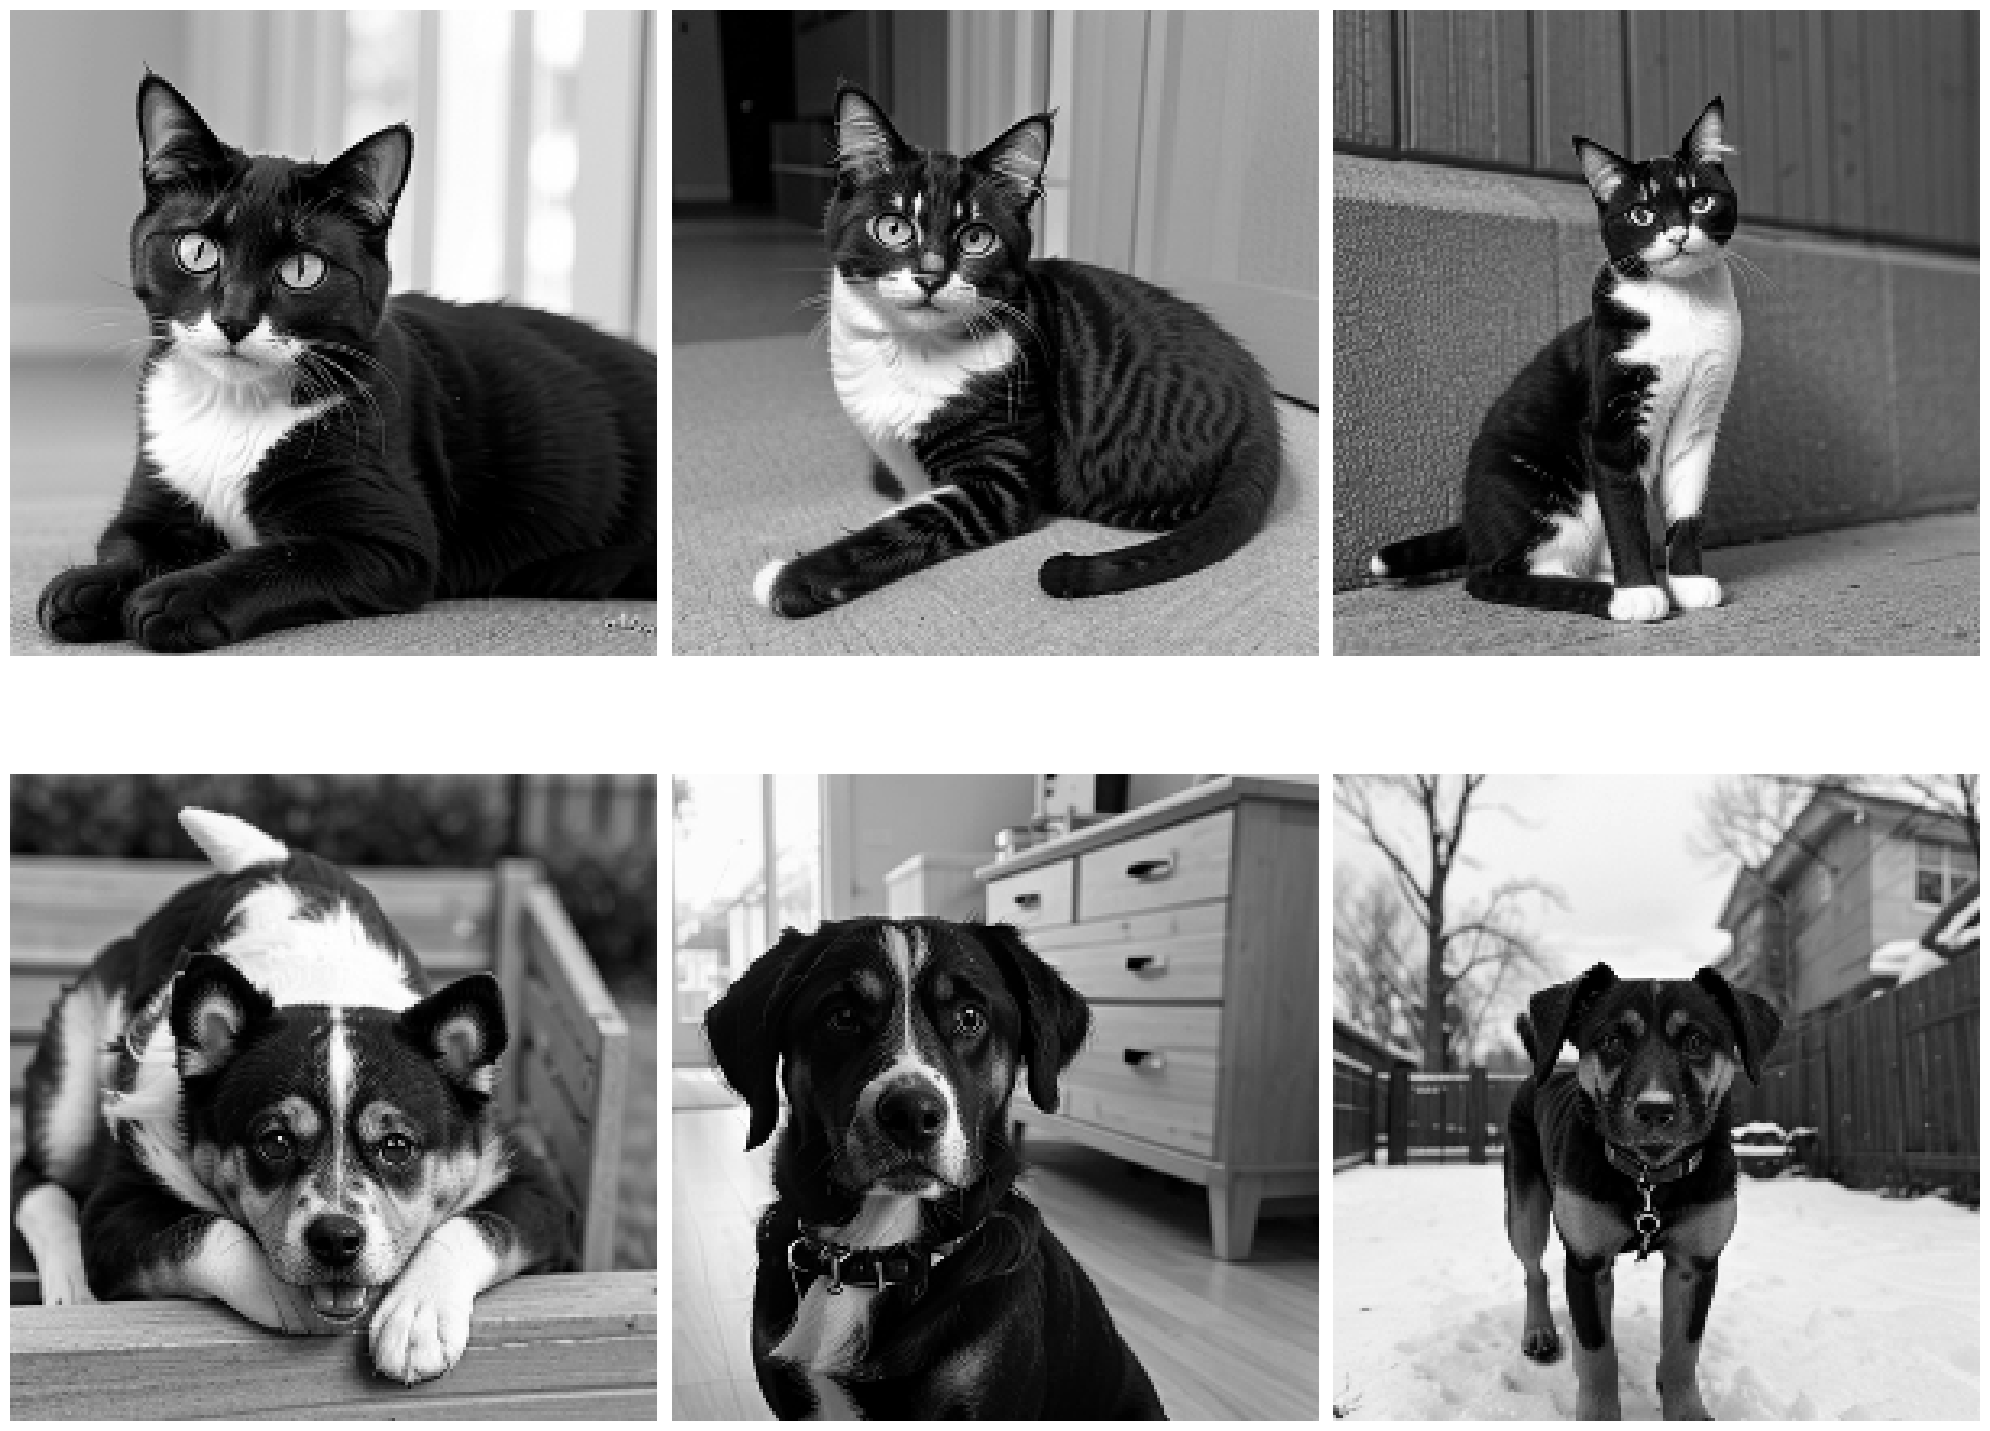

ImagePacker

In [5]:
train_packed

In [6]:
test_packed.rotate_images()

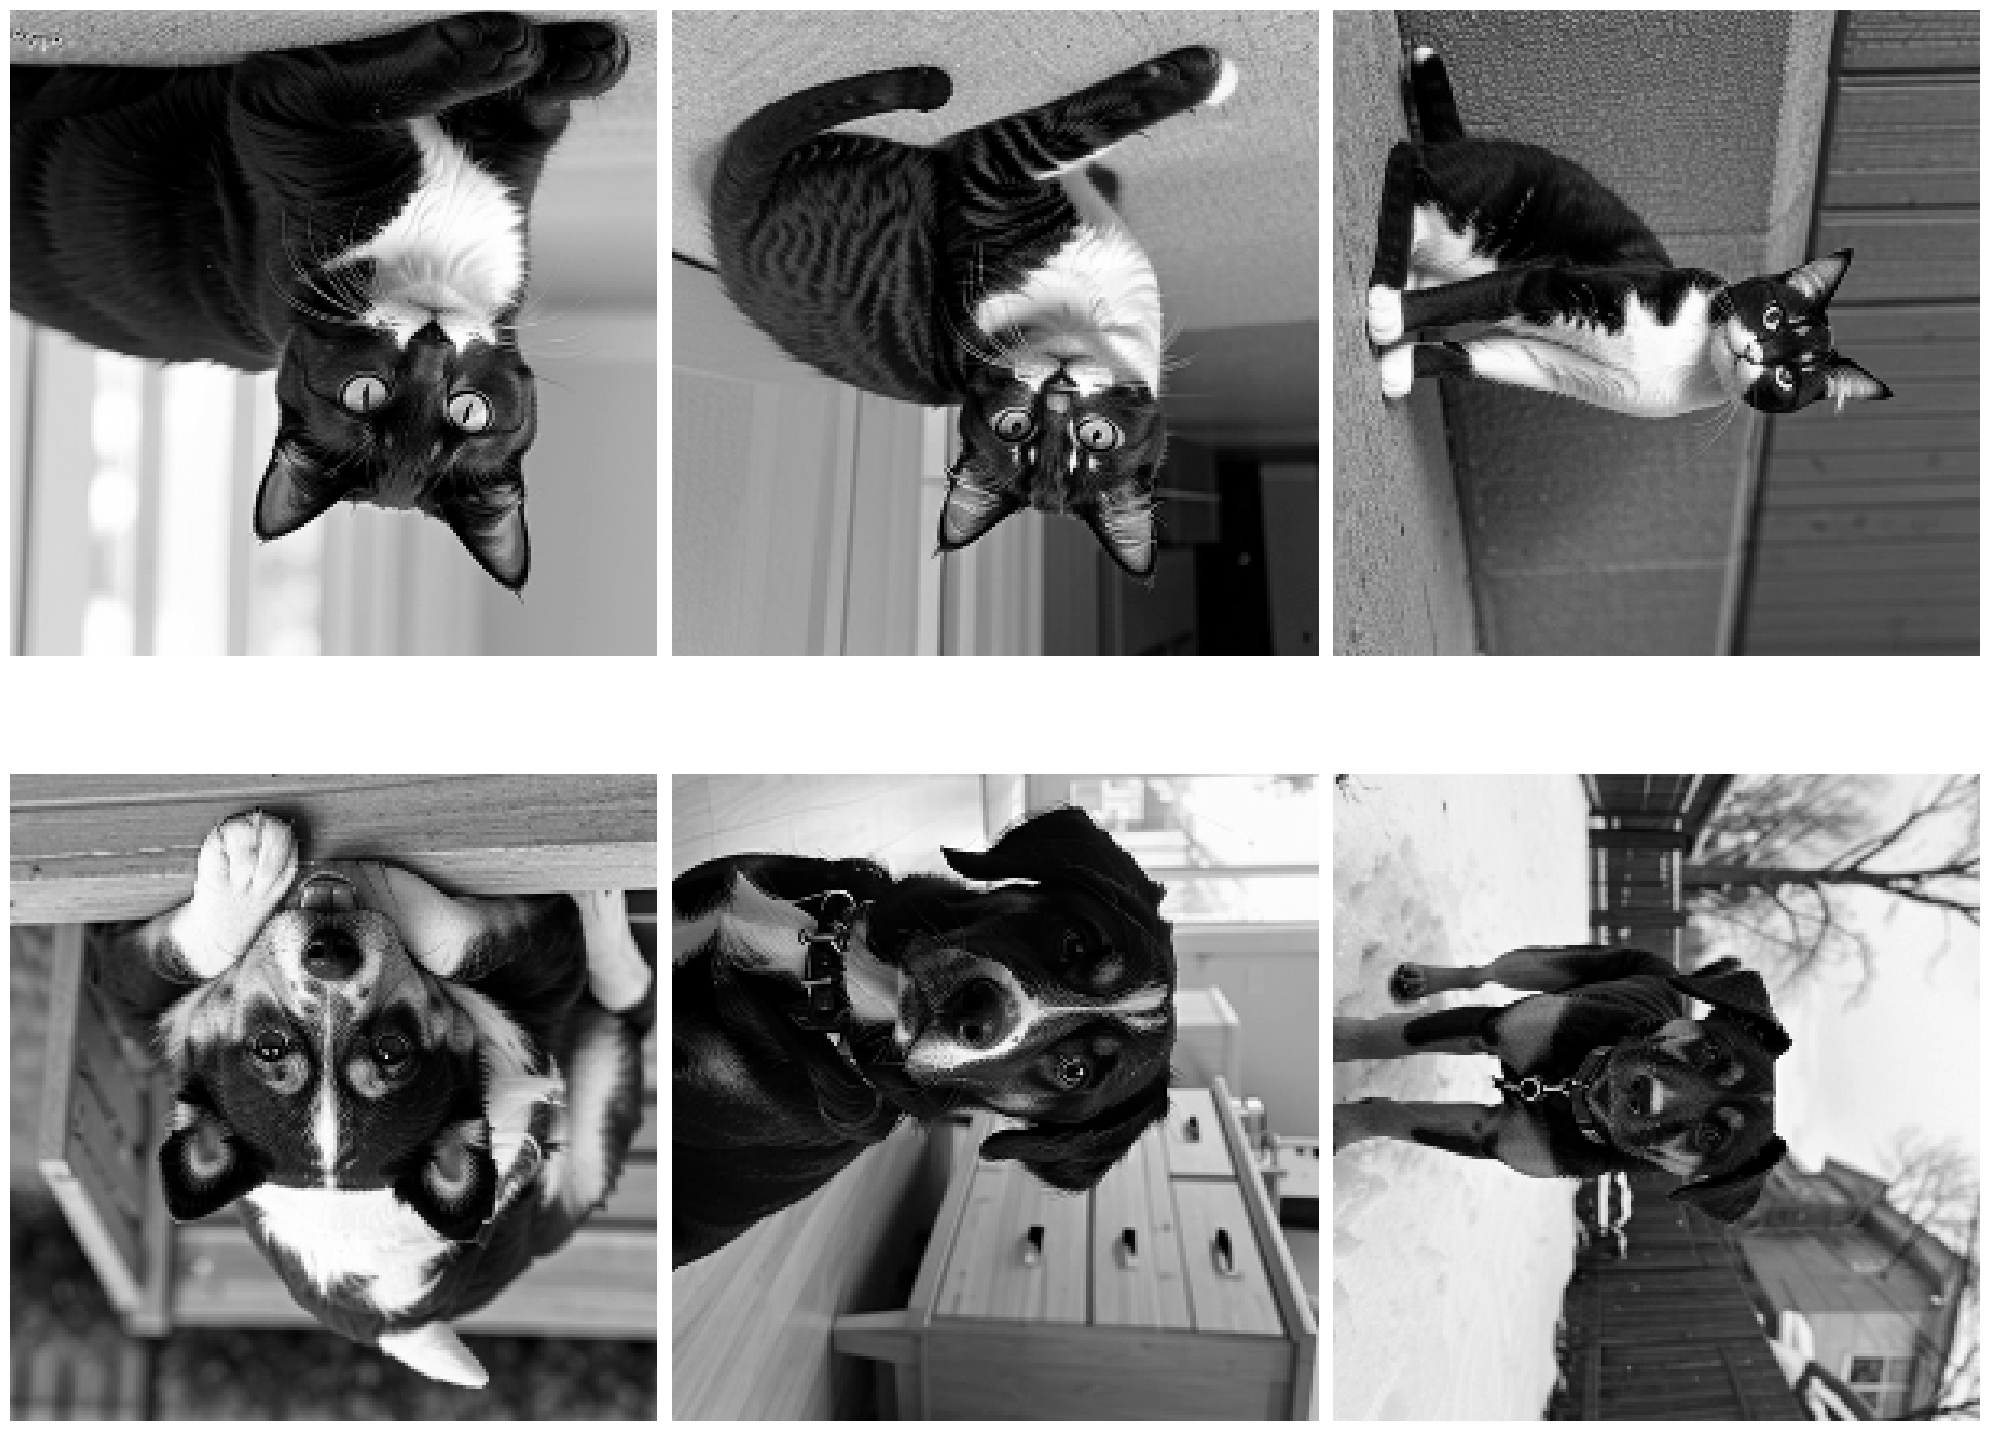

ImagePacker

In [7]:
test_packed

In [8]:
train_sift = train_packed.to_sift(append_label=[1,-1], block_size=8)
test_sift = test_packed.to_sift(append_label=[1,-1], block_size=8)

In [9]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [10]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
199,0.725476,0.324443,0.205196,0.000000,0.507833,0.000000,0.205196,0.162221,0.000000,0.894427,...,0.475165,0.064920,0.051324,0.094637,0.413151,0.051324,0.389523,0.277880,0.999391,-1
38,0.674200,0.000000,0.000000,0.482418,0.000000,0.000000,0.134840,0.248633,0.482418,0.800867,...,0.031765,0.000000,0.020746,0.011231,0.047043,0.007941,0.067982,0.296249,0.534319,1
150,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.548822,0.173553,0.439819,0.000000,0.109764,0.057851,0.000000,0.388076,0.984286,-1
183,0.990918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134468,0.959801,...,0.102298,0.017074,0.004136,0.000000,0.005549,0.012407,0.009284,0.022368,0.756222,-1
62,0.611276,0.000000,0.000000,0.000000,0.000000,0.287916,0.420571,0.435530,0.420571,0.606463,...,0.030443,0.024031,0.005352,0.000000,0.000000,0.037466,0.052924,0.032696,0.983392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.854069,0.482716,0.118159,0.079112,0.098126,0.000000,0.087767,0.000000,0.000000,0.930345,...,0.192180,0.287233,0.279323,0.000000,0.030386,0.000000,0.236350,0.251882,0.793238,1
16,0.566947,0.422577,0.534522,0.000000,0.377964,0.000000,0.267261,0.000000,0.000000,0.904521,...,0.190963,0.161034,0.127308,0.000000,0.569341,0.000000,0.080517,0.000000,0.862629,1
41,0.863868,0.193167,0.244339,0.000000,0.345547,0.000000,0.000000,0.193167,0.000000,0.833333,...,0.323041,0.374566,0.376881,0.000000,0.409326,0.107680,0.170257,0.206956,0.608008,1
99,0.799392,0.412338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.436977,0.907661,...,0.538828,0.292854,0.182751,0.073771,0.000000,0.165708,0.151730,0.262948,0.721525,1


In [11]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
180,0.702696,0.000000,0.492986,0.000000,0.000000,0.000000,0.000000,0.506917,0.078860,0.538485,...,0.000000,0.090814,0.104423,0.284518,0.000000,0.077070,0.253049,0.282567,0.587673,-1
53,0.767253,0.000000,0.000000,0.000000,0.257796,0.220496,0.300448,0.185290,0.414299,0.672211,...,0.392272,0.352789,0.515238,0.300812,0.290120,0.000000,0.000000,0.000000,0.702470,1
76,0.813685,0.000000,0.175124,0.420352,0.288589,0.180660,0.000000,0.000000,0.120958,0.793930,...,0.255960,0.337437,0.267883,0.170987,0.267449,0.143918,0.368201,0.064095,0.585198,1
121,0.766913,0.000000,0.506576,0.000000,0.000000,0.000000,0.036269,0.000000,0.392313,0.910268,...,0.506129,0.380221,0.190126,0.233821,0.128225,0.065084,0.391441,0.240001,0.665526,-1
93,0.817697,0.439026,0.041524,0.000000,0.037140,0.290666,0.052524,0.117447,0.185700,0.790088,...,0.047251,0.008795,0.001838,0.000000,0.005393,0.000000,0.002963,0.302923,0.958319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.715904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.698199,0.000000,0.640347,...,0.446645,0.000000,0.028920,0.000000,0.143861,0.057840,0.176479,0.535941,0.913855,-1
6,0.758947,0.424264,0.357771,0.000000,0.063246,0.000000,0.178885,0.282843,0.000000,0.936823,...,0.241687,0.206601,0.044720,0.103869,0.132949,0.000000,0.101275,0.505144,0.687457,1
100,0.801784,0.422577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.422577,0.721401,...,0.636383,0.000000,0.000000,0.000000,0.000000,0.041530,0.039068,0.187854,0.634743,-1
149,0.798640,0.000000,0.000000,0.000000,0.525753,0.247499,0.156532,0.000000,0.000000,0.729536,...,0.243422,0.067366,0.045971,0.034566,0.016872,0.215944,0.183890,0.318262,0.757899,-1


In [12]:
train_X, train_y = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [13]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [14]:
predictions = model.predict(test_X)


In [15]:
f"Accuracy: {round(accuracy_score(test_y, predictions)*100,3)} %"

'Accuracy: 54.5 %'

In [16]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

          -1       0.52      0.95      0.68       100
           1       0.74      0.14      0.24       100

    accuracy                           0.55       200
   macro avg       0.63      0.54      0.46       200
weighted avg       0.63      0.55      0.46       200



In [17]:
mat = confusion_matrix(test_y, predictions)

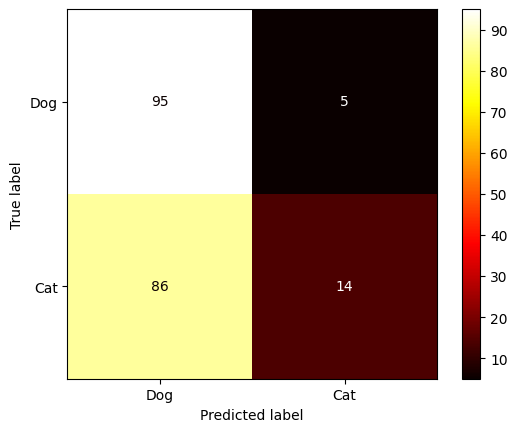

In [18]:
cmd = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['Dog', 'Cat'])
cmd.plot(cmap="hot")